Important

p - AR

d - diff

q - MA

### AutoRegressive (AR) Model

An **AutoRegressive (AR) Model** is a time series model that predicts the current value based on its past values.

#### Key Points

##### Formula
$$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t$$

Components:
  -  yt  : Current value
  - Φ1, Φ2, Φ3 : Coefficients for lags
  - εt : Error term
  - p : Order of the model (number of lags)

##### Characteristics
- It assumes that past values have a linear relationship with the current value
- The model is only based on the series' past values and does not consider external factors

#### Applications
- Used for forecasting in stationary time series
- Commonly applied in fields like finance, economics, and weather forecasting

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [220]:
coal_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\Coal Consumption.csv', index_col=0)
coal_df.index = pd.to_datetime(coal_df.index, errors='coerce')
coal_df.head()

,Amount
Month,
1990-01-01,16.50
1990-02-01,15.17
1990-03-01,12.75
1990-04-01,12.31
1990-05-01,8.34


In [221]:
len(coal_df) 

132

In [222]:
y = coal_df['Amount']

In [223]:
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((120,), (12,))

In [224]:
order_of_auto_regressive_model = 1 #p
order_of_differencing = 0  #d
order_of_moving_avg_model = 0 #q

model = ARIMA(y_train, order=(order_of_auto_regressive_model, order_of_differencing, order_of_moving_avg_model), freq='MS')
model_fit = model.fit()

In [225]:
model_fit.params

const     11.821521
ar.L1      0.629549
sigma2    10.186583
dtype: float64

In [226]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)


RMSE:  4.433431724353963


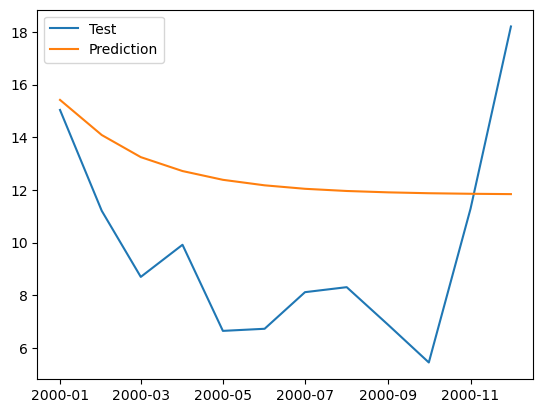

In [227]:
y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

#### Using `n`th order differencing 

In [228]:
milk_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0) 
milk_df.index = pd.to_datetime(milk_df.index, errors='coerce')

y = milk_df['Milk']
 

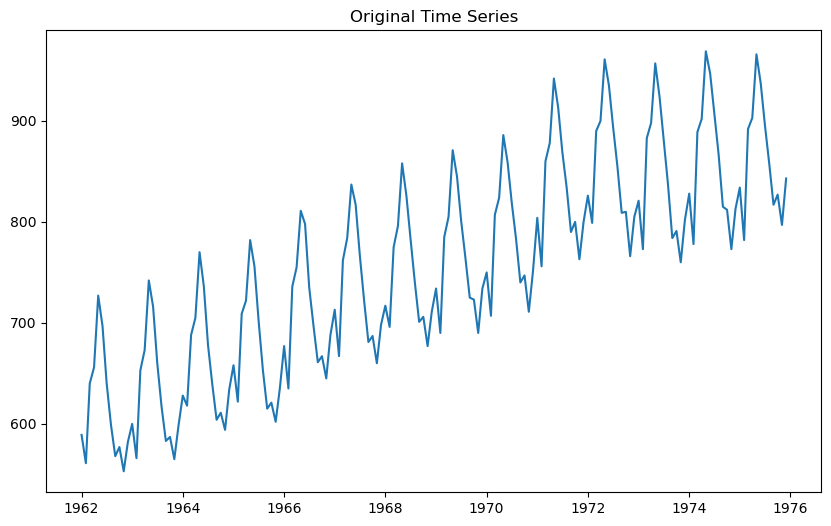

In [229]:
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title("Original Time Series")
plt.show()

In [230]:
def differencing_arima(n_diff ):
    print(f'Arima with differencing {n_diff}')

    y_diff = y.diff(n_diff).dropna()


    y_train = y_diff[:-12]
    y_test = y_diff[-12:]

    print("Train/Test Shape: ", y_train.shape, y_test.shape)


    #p
    order_of_auto_regressive_model = 12 
    #d
    order_of_differencing = 2
    #q
    order_of_moving_avg_model = 0 

    model = ARIMA(y_train, order=(order_of_auto_regressive_model, order_of_differencing, order_of_moving_avg_model), freq='MS')
    model_fit = model.fit()

    print(pd.DataFrame(model_fit.params))

    y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index 

    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.text(1975, 10, f'RMSE: {error:.2f}', horizontalalignment='center')
    plt.legend()
    plt.show()


Arima with differencing 1
Train/Test Shape:  (155,) (12,)
                 0
ar.L1    -1.679185
ar.L2    -1.657949
ar.L3    -1.616808
ar.L4    -1.636127
ar.L5    -1.654160
ar.L6    -1.645209
ar.L7    -1.597441
ar.L8    -1.629167
ar.L9    -1.660570
ar.L10   -1.649536
ar.L11   -1.609506
ar.L12   -0.657697
sigma2  196.930192
RMSE:  9.242549864259024


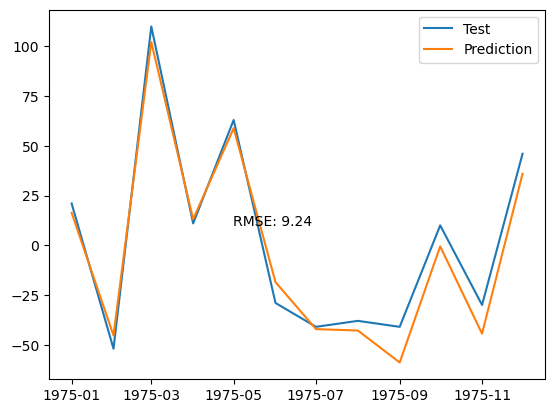

Arima with differencing 2
Train/Test Shape:  (154,) (12,)
                 0
ar.L1    -0.098024
ar.L2    -0.106178
ar.L3    -0.081238
ar.L4    -0.097526
ar.L5    -0.104193
ar.L6    -0.095846
ar.L7    -0.059686
ar.L8    -0.093103
ar.L9    -0.082173
ar.L10   -0.084069
ar.L11   -0.065536
ar.L12    0.903956
sigma2  179.244340
RMSE:  16.915757491901697


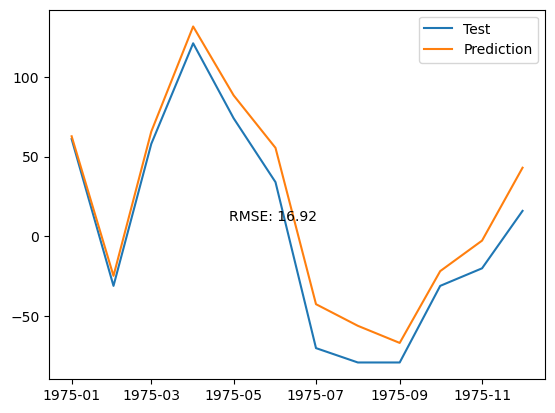

Arima with differencing 3
Train/Test Shape:  (153,) (12,)
                 0
ar.L1    -1.006826
ar.L2    -0.596412
ar.L3    -0.784354
ar.L4    -0.985813
ar.L5    -0.562182
ar.L6    -0.753049
ar.L7    -0.994488
ar.L8    -0.605517
ar.L9    -0.785651
ar.L10   -1.003773
ar.L11   -0.598520
ar.L12    0.212167
sigma2  248.334557
RMSE:  22.63793791609668


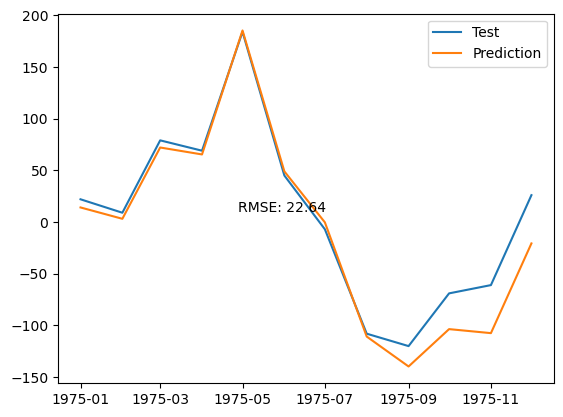

In [231]:
for i in range(1, 4):
    differencing_arima(i)

---


### Simple Moving Average (SMA)

A **Simple Moving Average (SMA)** model is a time series forecasting method that smooths the data by averaging a fixed number of past observations.

#### Key Points

##### Formula
$$\hat{y}_t = \frac{1}{n} \sum_{i=t-n+1}^{t} y_i$$

Components:
- ŷt = Forecasted value at time t
- yi = Observed values from time t−n+1 to ttt
- n = Window size (number of past periods used)

##### Characteristics
- It averages over a fixed window (e.g., 3, 5, or 10 periods)
- Each observation in the window is weighted equally

#### Applications
- Commonly used for smoothing time series data to identify trends
- Simple to implement and often used in short-term forecasting when data shows a stable pattern

---


### Moving Average (MA) Model

A **Moving Average (MA) Model** is a time series model that predicts the current value based on past error terms (residuals) rather than the actual past values.

#### Key Points

##### Formula
$$y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$

Where:
- yt: Observed value at time t
- ε: White noise or error term at time t 
- θ1, θ2, θ3: Parameters (weights) for the lagged error terms
- q: Order of the MA model (number of lagged error terms) 

##### Characteristics
- The model uses past error terms to forecast the current value
- It is useful for modeling time series with random noise or irregular fluctuations

#### Applications
- Commonly used to model and forecast series with noise and no clear trend or seasonal patterns
- Often used in conjunction with **AR (AutoRegressive)** models to form the **ARMA** (AutoRegressive Moving Average) or **ARIMA** (AutoRegressive Integrated Moving Average) models

In [232]:
milk_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0) 
milk_df.index = pd.to_datetime(milk_df.index, errors='coerce')

y = milk_df['Milk']

In [233]:
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [234]:
order_of_auto_regressive_model = 0 #p
order_of_differencing = 0  #d
order_of_moving_avg_model = 1 #q

# for moving averafge - q will be equal to 1 

model = ARIMA(y_train, order=(order_of_auto_regressive_model, order_of_differencing, order_of_moving_avg_model), freq='MS')
model_fit = model.fit()

In [235]:
model_fit.params

const      746.425266
ma.L1        0.767759
sigma2    4357.968219
dtype: float64

RMSE:  126.20472442575637


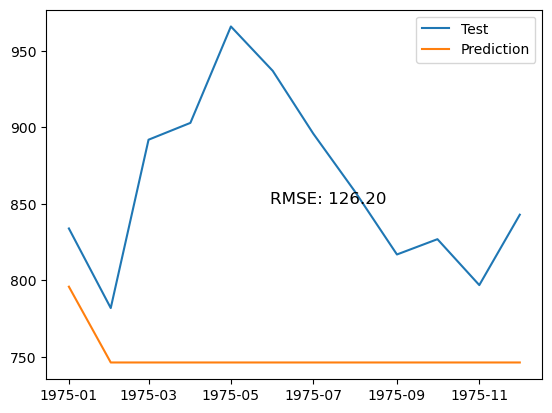

In [236]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)


y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.text(1975, 850,f'RMSE: {error:.2f}', fontsize=12)
plt.legend()
plt.show()

---


# ARMA (AutoRegressive Moving Average) Model

The **ARMA (AutoRegressive Moving Average) Model** combines both **AutoRegressive (AR)** and **Moving Average (MA)** models to capture the dynamics of a time series. It is used for stationary time series data.

## Key Points

### Formula
$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

Where:
- y_t: Current value
- ϕ1​,ϕ2​,…,ϕp: AR coefficients (lags of the series)
- θ1​,θ2​,…,θq: MA coefficients (lags of error terms)
- ϵt​: Error terms (white noise)
- c: Constant (optional)
- p: Order of the AR part (number of lags)
- q: Order of the MA part (number of error lags)

### Characteristics
- **AR** part models the relationship between the current value and its past values
- **MA** part models the relationship between the current value and past error terms
- It is effective for stationary data, where mean, variance, and autocovariance are constant over time

$$
\log(y_t) = \beta_0 + \sum_{i=1}^{p} \beta_i \log(y_{t-i}) + \epsilon_t + \sum_{j=1}^{q} \theta_j \epsilon_{t-j}
$$
 

### Applications
- Used for forecasting time series data that is stationary and exhibits both autoregressive and moving average behavior
- Commonly applied in economics, finance, and weather forecasting

### Generalization
- The ARMA model is extended to **ARIMA (AutoRegressive Integrated Moving Average)** for non-stationary time series by adding differencing to make the series stationary

---


### ARIMA (AutoRegressive Integrated Moving Average)

The **ARIMA (AutoRegressive Integrated Moving Average)** model is an extension of the ARMA model that is used for forecasting **non-stationary** time series data by including differencing to make the data stationary.

##### Key Components:
- **AR** (AutoRegressive): Models the relationship between the current value and its past values.
- **I** (Integrated): Represents differencing of the time series to make it stationary.
- **MA** (Moving Average): Models the relationship between the current value and past error terms (residuals).

##### ARIMA Model Formula:
$$
\Phi(B)(1 - B)^d y_t = \Theta(B) \epsilon_t
$$

##### Where:
* **$y_t$**: Observed value at time $t$
* **$B$**: Backshift operator (e.g., $B^k y_t = y_{t-k}$)
* **$\Phi(B)$**: AR part (autoregressive operator)
* **$(1 - B)^d$**: Differencing operator to make the series stationary
* **$\Theta(B)$**: MA part (moving average operator)
* **$\epsilon_t$**: Error terms (white noise)
* **$d$**: Degree of differencing

##### Key Parameters:
- **p**: Order of the AR part (number of past values used).
- **d**: Degree of differencing to make the series stationary.
- **q**: Order of the MA part (number of past error terms used).

##### Characteristics:
- ARIMA is ideal for forecasting **non-stationary** time series data (e.g., data with trends or seasonality).
- The model is flexible and can handle various types of time series patterns by adjusting the parameters.

##### Steps for Using ARIMA:
1. **Differencing**: Make the series stationary by differencing (i.e., subtracting the previous value from the current value).
2. **Identify p, d, q**: Use tools like ACF/PACF plots or grid search to determine the best values for AR, differencing, and MA orders.
3. **Fit the Model**: Fit the ARIMA model to the data.
4. **Forecast**: Use the fitted model to predict future values.

##### Applications:
- Widely used for forecasting in finance (stock prices), economics (GDP, inflation), and operations (inventory, demand forecasting).

---


##### SARIMA (Seasonal ARIMA)
**SARIMA (Seasonal ARIMA)** is an extension of the ARIMA model that handles **seasonality** in time series data. It incorporates seasonal differencing and seasonal autoregressive (AR) and moving average (MA) components.

##### Key Components:
- **AR** (AutoRegressive): Models the relationship between the current value and its past values.
- **I** (Integrated): Represents differencing to make the series stationary.
- **MA** (Moving Average): Models the relationship between the current value and past error terms.
- **S** (Seasonal): Adds seasonal components for periodic behavior.

##### SARIMA Model Formula:
##### Formula
$$
\Phi(B^s)(1 - B^s)^d y_t = \Theta(B^s) \epsilon_t
$$

##### Where:
* **$y_t$**: Observed value at time $t$
* **$B$**: Backshift operator (e.g., $B^k y_t = y_{t-k}$)
* **$\Phi(B^s)$**: Seasonal AR part (autoregressive operator for seasonality)
* **$(1 - B^s)^d$**: Seasonal differencing (seasonal integration)
* **$\Theta(B^s)$**: Seasonal MA part (moving average for seasonality)
* **$\epsilon_t$**: Error terms (white noise)
* **$s$**: Length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality)
* **$d$**: Degree of seasonal differencing

##### SARIMA Parameters:
- **p**: Order of the AR part (number of past values used).
- **d**: Degree of differencing to make the series stationary.
- **q**: Order of the MA part (number of past error terms used).
- **P**: Seasonal AR part (number of past seasonal values used).
- **D**: Seasonal differencing (degree of differencing for seasonality).
- **Q**: Seasonal MA part (number of past seasonal error terms used).
- **s**: Length of the seasonal period (e.g., 12 for monthly data with annual seasonality).

##### Characteristics:
- **SARIMA** captures both **non-seasonal** and **seasonal** patterns, making it ideal for time series data with periodic behavior, such as monthly sales or annual temperatures.
- Seasonal differencing and seasonal components make it more flexible for handling repetitive trends.

##### Steps for Using SARIMA:
1. **Seasonal Differencing**: Make the series stationary by differencing for seasonal patterns.
2. **Identify p, d, q, P, D, Q, s**: Use tools like ACF/PACF plots or grid search to determine the best seasonal and non-seasonal components.
3. **Fit the Model**: Fit the SARIMA model to the data.
4. **Forecast**: Use the fitted model to predict future values while accounting for seasonality.

##### Applications:
- Used in forecasting data with **seasonal patterns**, such as monthly sales, climate data, or economic indicators that exhibit regular seasonal fluctuations.

In [237]:
milk_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0) 
milk_df.index = pd.to_datetime(milk_df.index, errors='coerce')

y = milk_df['Milk']

In [238]:
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [239]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='MS', 
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()

In [240]:
model_fit.params

ar.L1       -0.263642
ar.L2       -0.044438
ar.L3        0.097068
ar.S.L12    -0.051477
ma.S.L12    -0.579486
sigma2      53.356117
dtype: float64

RMSE:  10.448496929973517


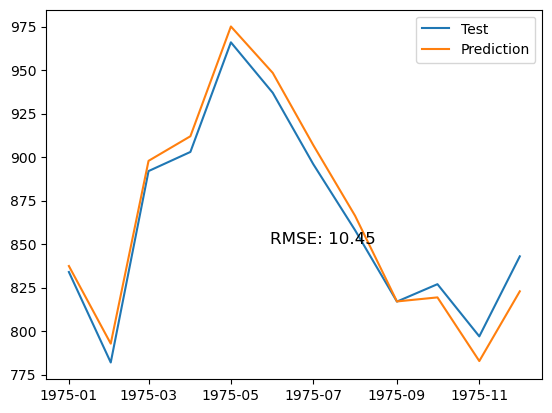

In [241]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.text(1975, 850,f'RMSE: {error:.2f}', fontsize=12)
plt.legend()
plt.show()

---


### AutoARIMA - Not a model it is a library

In [248]:
milk_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\monthly-milk-production-pounds-p.csv', index_col=0) 
milk_df.index = pd.to_datetime(milk_df.index, errors='coerce')

y = milk_df['Milk']

y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [249]:
from pmdarima.arima import auto_arima

In [256]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.text(1975, 850,f'RMSE: {error:.2f}', fontsize=8)
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.691, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.571, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.631, Time=1.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 s

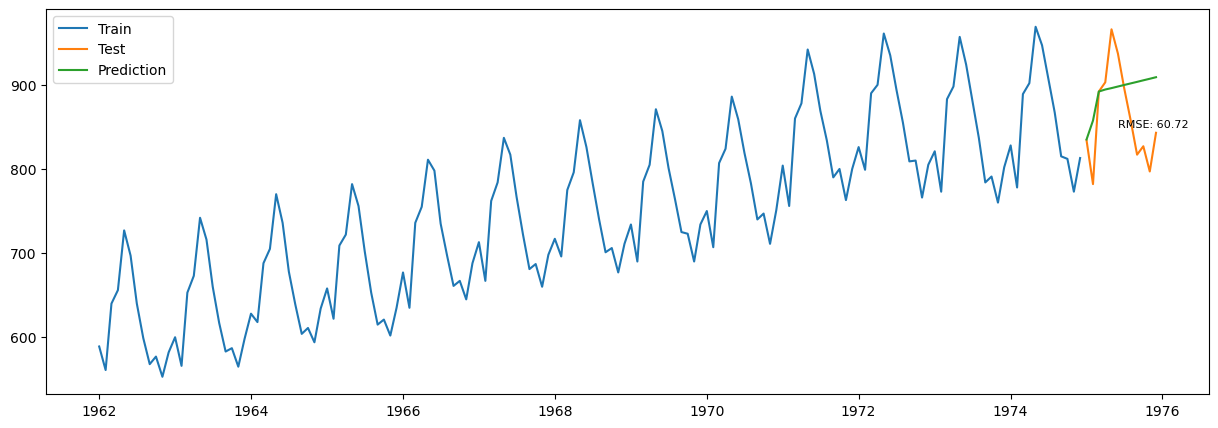

In [257]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=2.00 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.44 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.45 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=3.42 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.19 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.87 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.25 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.13 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.25 sec
 ARIMA(1,0,2)(1,1,0)[12] int

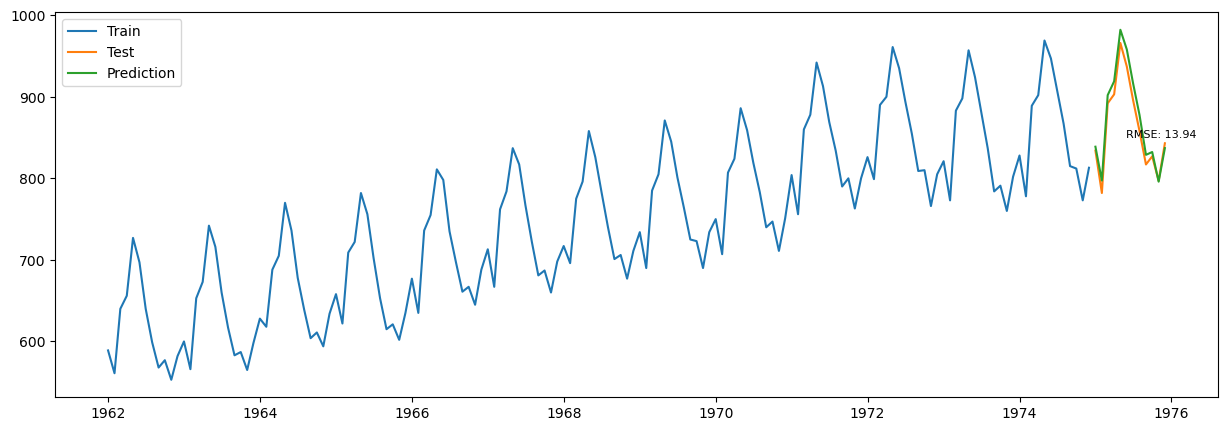

In [258]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)